In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression
import warnings


In [ ]:
# Mounting Google Drive
from google.colab import drive

# Mount the Google Drive to the '/content/drive' directory
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading CSV file from Google Drive

# Defining the file path to your CSV file in Google Drive
df = pd.read_csv(r'/content/drive/MyDrive/monthly_csv.csv')


In [ ]:
# Displaying the first 5 rows of the DataFrame
df.head(5)

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [ ]:
# Print the dimensions (shape) of the dataset
print("Dimension of the dataset:", df.shape)


Dimension of the dataset: (847, 2)


In [ ]:
# Printing the date range of the dataset
print(f"Date range of gold price is available from {df.loc[:, 'Date'][0]} to {df.loc[:, 'Date'][len(df) - 1]}")


Date range of gold price is available from 1950-01 to 2020-07


In [ ]:
date = pd.date_range(start='1/1/1950', end='8/1/2020', freq="M")
print(date)

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')


In [ ]:
# Creating a 'month' column from the date range and setting it as the index

# Step 1: Create a 'month' column from the date range
df['month'] = date

# Step 2: Drop the original 'Date' column as it no longer needed
df.drop('Date', axis=1, inplace=True)

# Step 3: Set the 'month' column as the new index of the Df
df = df.set_index('month')

# Step 4: Display the first 5 rows of the updated Df
df.head(5)

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


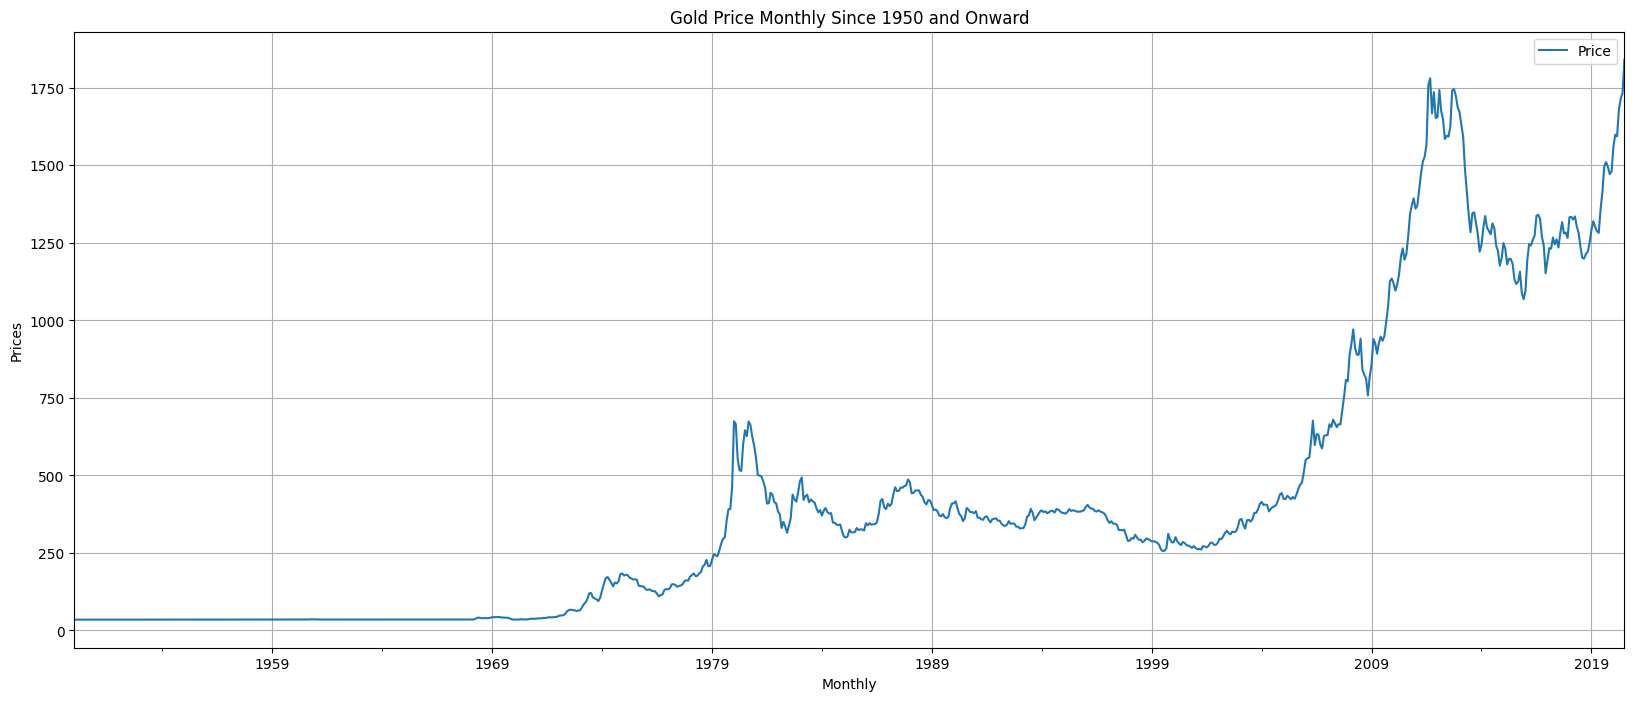

In [ ]:
# Plotting monthly Gold Prices
# Step 1: Use the plot function to create a line plot of the Gold Price data
df.plot(figsize=(20, 8))

# Step 2: Setting the title of the plot
plt.title('Gold Price Monthly Since 1950 and Onward')

# Step 3: Label the x-axis
plt.xlabel('Monthly')

# Step 4: Label the y-axis
plt.ylabel('Prices')

# Step 5: Add a grid to the plot
plt.grid()

# Step 6: Display the plot
plt.show()


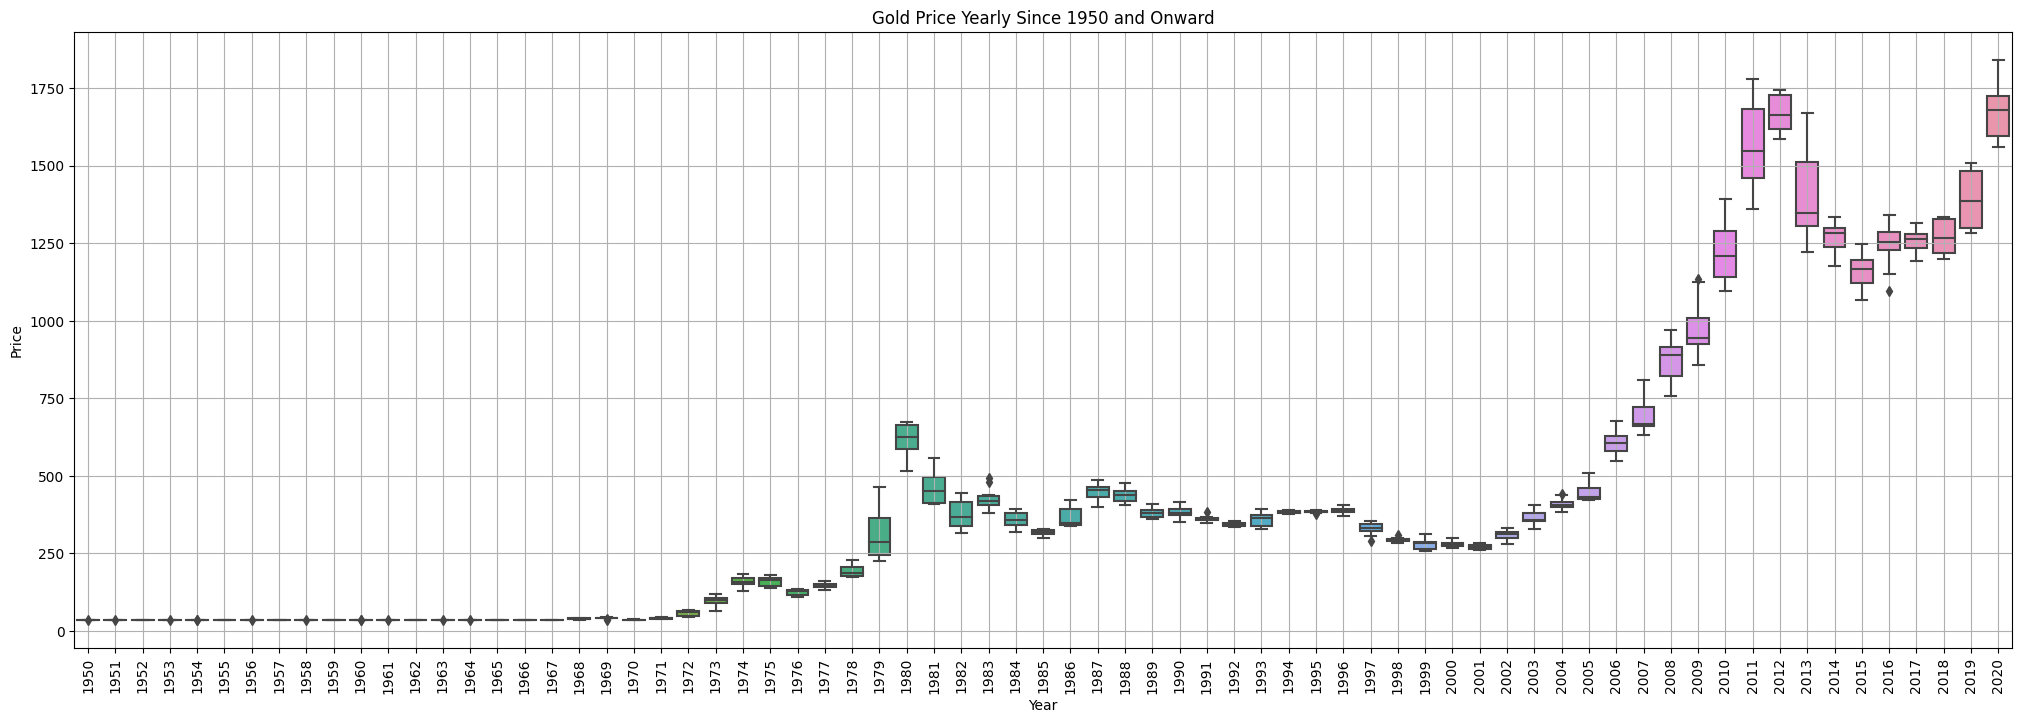

In [ ]:
# Plotting Gold Price yearly using a boxplot

# Step 1: Create a subplot with a specified figure size
fig, ax = plt.subplots(figsize=(25, 8))
# Step 2: Create a boxplot with the year on the x-axis and Gold Price values on the y-axis
sns.boxplot(x=df.index.year, y=df.values[:, 0], ax=ax)
# Step 3: Set the title of the plot
plt.title('Gold Price Yearly Since 1950 and Onward')
# Step 4: Label the x-axis
plt.xlabel('Year')
# Step 5: Label the y-axis
plt.ylabel('Price')
# Step 6: Rotate x-axis labels for better readability
plt.xticks(rotation=90)
# Step 7: Add a grid to the plot
plt.grid()
# Step 8: Display the plot
plt.show()

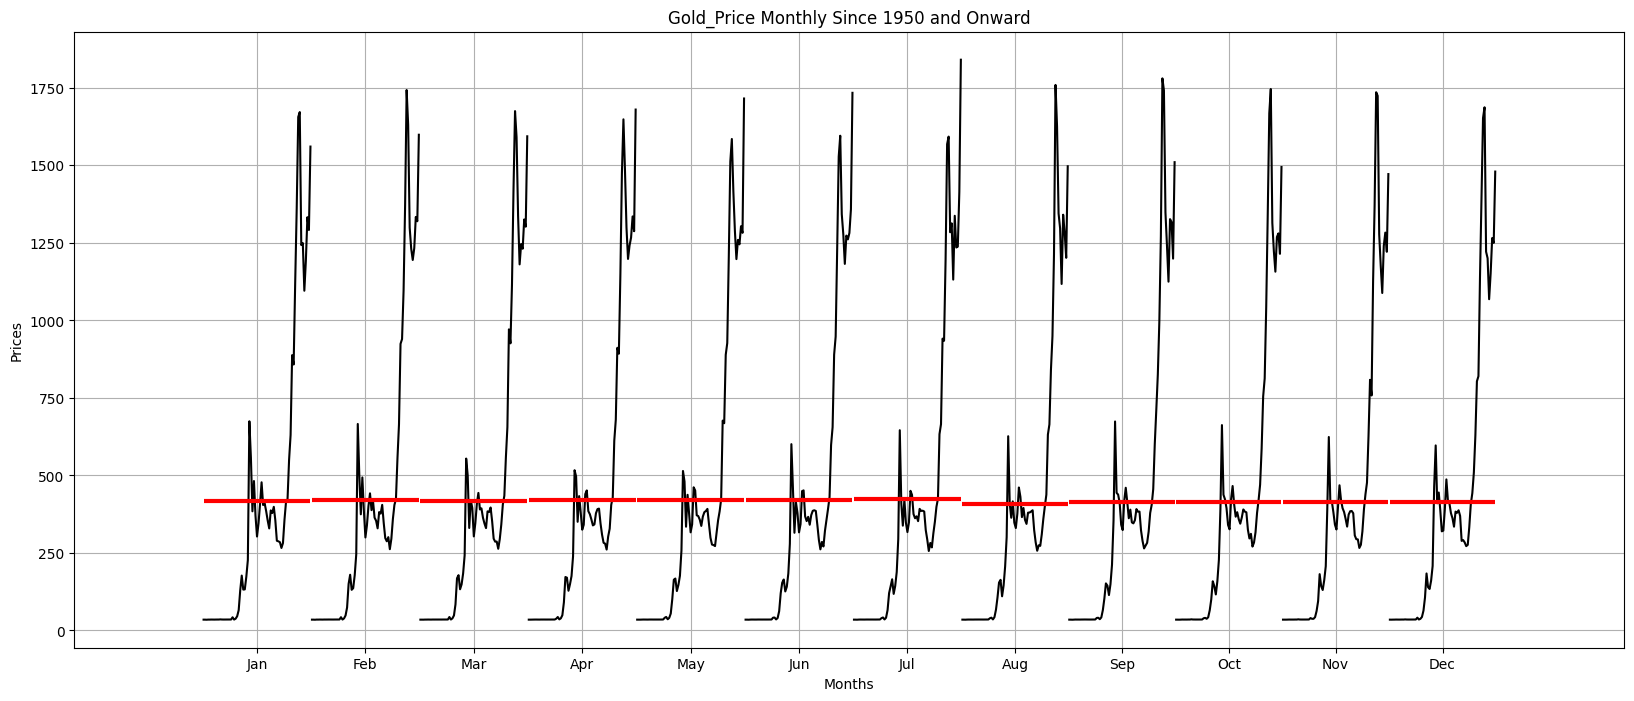

In [ ]:
# Plotting Gold Price data using a month plot

# Step 1: Create a subplot with a specified figure size
fig, ax = plt.subplots(figsize=(20, 8))

# Step 2: Use the month_plot function to create the month plot
from statsmodels.graphics.tsaplots import month_plot
month_plot(df, ylabel='Gold_Price', ax=ax)

# Step 3: Set the title of the plot
plt.title('Gold_Price Monthly Since 1950 and Onward')

# Step 4: Label the x-axis
plt.xlabel('Months')

# Step 5: Label the y-axis
plt.ylabel('Prices')

# Step 6: Add a grid to the plot
plt.grid()

# Step 7: Display the plot
plt.show()

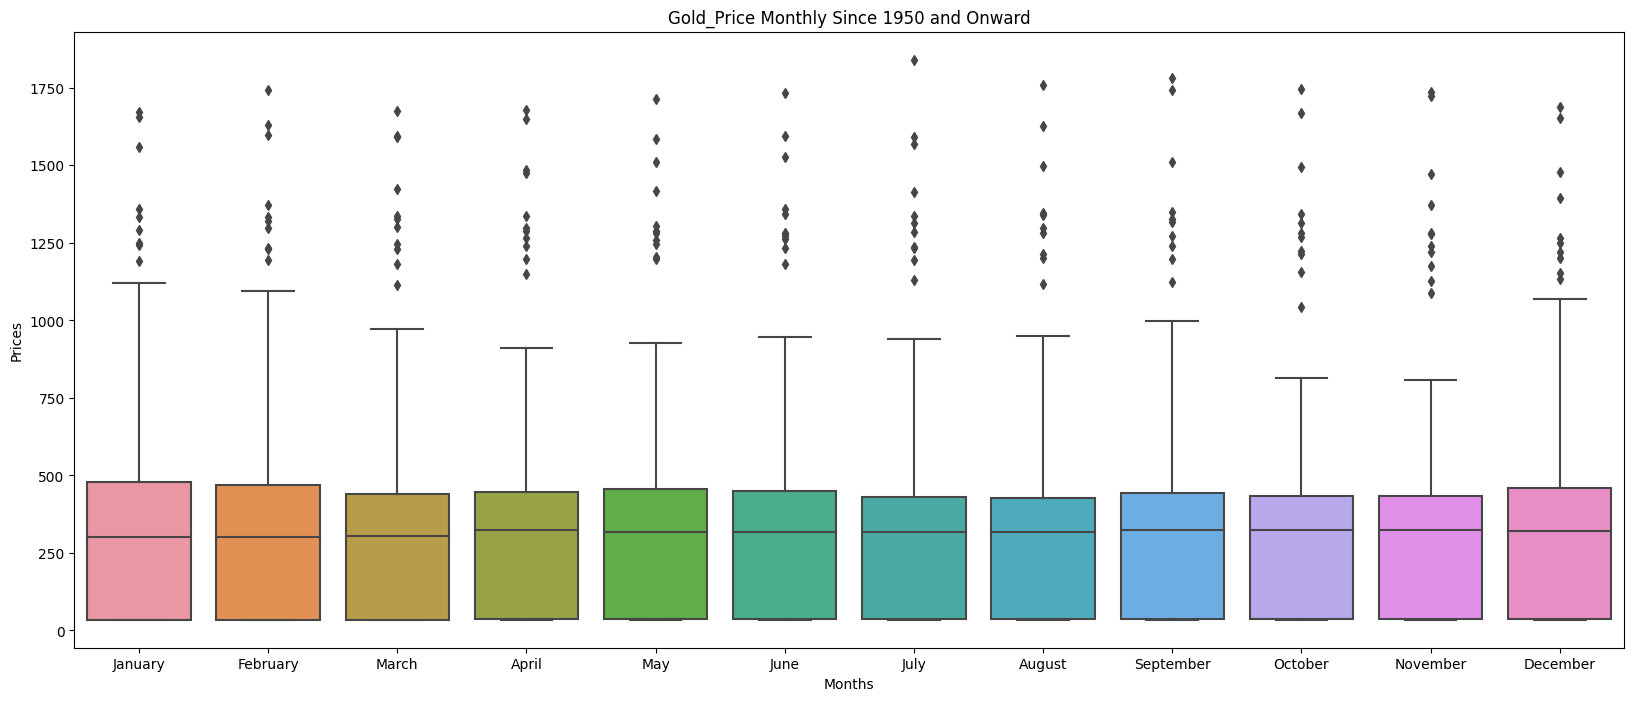

In [ ]:
# Create a boxplot of Gold Price data grouped by months

# Step 1: Create a subplot with a specified figure size
fig, ax = plt.subplots(figsize=(20, 8))

# Step 2: Create a boxplot using Seaborn, with months on the x-axis and Gold Price values on the y-axis
sns.boxplot(x=df.index.month_name(), y=df.values[:, 0], ax=ax)

# Step 3: Set the title of the plot
plt.title('Gold_Price Monthly Since 1950 and Onward')

# Step 4: Label the x-axis
plt.xlabel('Months')

# Step 5: Label the y-axis
plt.ylabel('Prices')

# Step 6: Display the plot
plt.show()

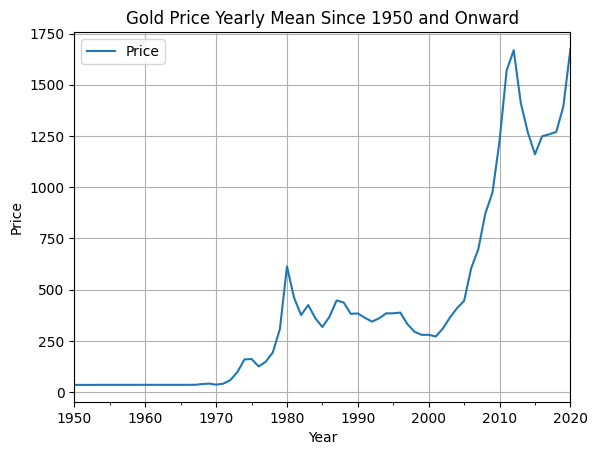

In [ ]:
# Calculate yearly mean of Gold Price and plot it

# Step 1: Resample the data to calculate the yearly mean
df_yearly_mean = df.resample('A').mean()

# Step 2: Create a line plot of the yearly mean data
df_yearly_mean.plot()

# Step 3: Set the title of the plot
plt.title('Gold Price Yearly Mean Since 1950 and Onward')

# Step 4: Label the x-axis
plt.xlabel('Year')

# Step 5: Label the y-axis
plt.ylabel('Price')

# Step 6: Add a grid to the plot
plt.grid()

# Step 7: Display the plot
plt.show()

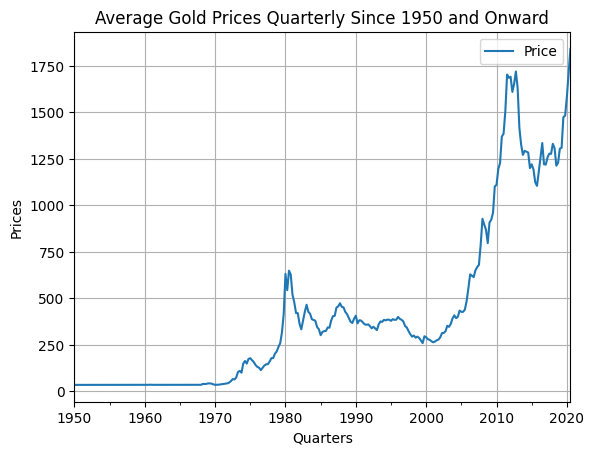

In [ ]:
# Calculate quarterly mean of Gold Price and plot it

# Step 1: Resample the data to calculate the quarterly mean
df_quarterly_mean = df.resample('Q').mean()

# Step 2: Create a line plot of the quarterly mean data
df_quarterly_mean.plot()

# Step 3: Set the title of the plot
plt.title('Average Gold Prices Quarterly Since 1950 and Onward')

# Step 4: Label the x-axis
plt.xlabel('Quarters')

# Step 5: Label the y-axis
plt.ylabel('Prices')

# Step 6: Add a grid to the plot
plt.grid()

# Step 7: Display the plot
plt.show()


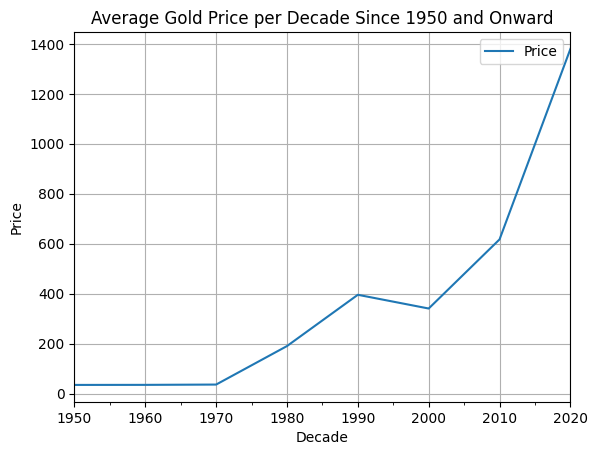

In [ ]:
# Calculate the average Gold Price per decade and plot it

# Step 1: Resample the data to calculate the average per decade
df_decade_mean = df.resample('10Y').mean()

# Step 2: Create a line plot of the average per decade
df_decade_mean.plot()

# Step 3: Set the title of the plot
plt.title('Average Gold Price per Decade Since 1950 and Onward')

# Step 4: Label the x-axis
plt.xlabel('Decade')

# Step 5: Label the y-axis
plt.ylabel('Price')

# Step 6: Add a grid to the plot
plt.grid()

# Step 7: Display the plot
plt.show()

In [ ]:
# Calculate mean, standard deviation, and coefficient of variation percentage (Cov_pct) on a yearly basis

# Step 1: Calculate the mean of Gold Price for each year and rename the 'Price' column to 'Mean'
df_mean = df.groupby(df.index.year).mean().rename(columns={'Price': 'Mean'})

# Step 2: Calculate the standard deviation of Gold Price for each year and rename the 'Price' column to 'Std'
df_std = df.groupby(df.index.year).std().rename(columns={'Price': 'Std'})

# Step 3: Merge the mean and standard deviation DataFrames using the year as the common index
df_1 = df_mean.merge(df_std, left_index=True, right_index=True)

# Step 4: Calculate the coefficient of variation percentage (Cov_pct)
df_1['Cov_pct'] = ((df_1['Std'] / df_1['Mean']) * 100).round(2)

# Step 5: Display the first 5 rows of the resulting DataFrame
df_1.head()


,Mean,Std,Cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


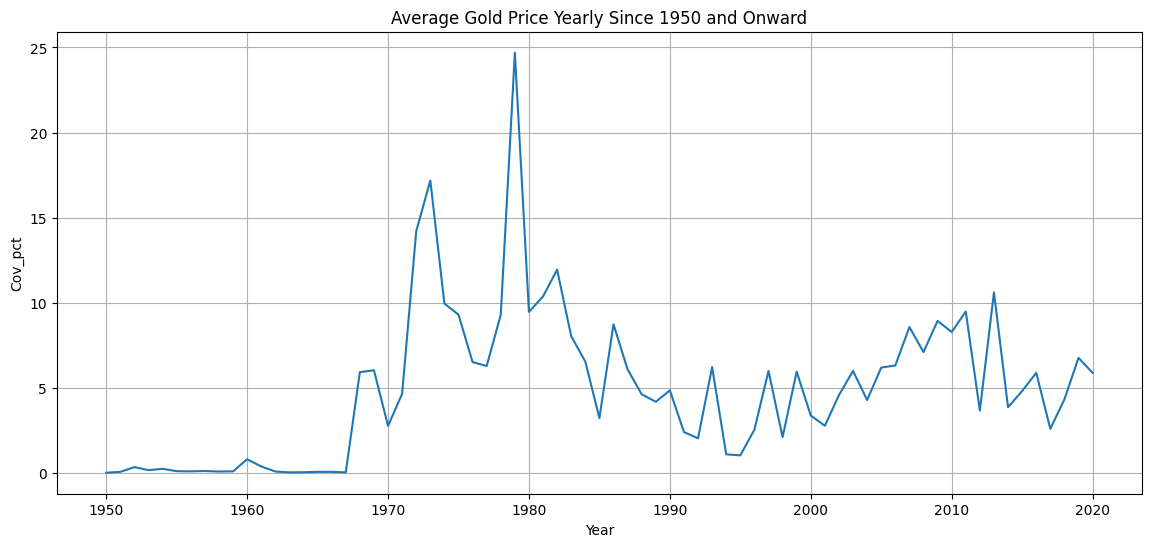

In [ ]:
# Plotting the Coefficient of Variation Percentage (Cov_pct) of Gold Price on a yearly basis

# Step 1: Create a subplot with a specified figure size
fig, ax = plt.subplots(figsize=(14, 6))

# Step 2: Plot the Cov_pct column from the df_1 DataFrame
df_1['Cov_pct'].plot(ax=ax)

# Step 3: Set the title of the plot
plt.title('Average Gold Price Yearly Since 1950 and Onward')

# Step 4: Label the x-axis
plt.xlabel('Year')

# Step 5: Label the y-axis
plt.ylabel('Cov_pct')

# Step 6: Add a grid to the plot
plt.grid()

# Step 7: Display the plot
plt.show()


In [ ]:
# Splitting the dataset into training and testing based on the year

# Step 1: Create the training dataset with data up to the year 2015
train = df[df.index.year <= 2015]

# Step 2: Create the testing dataset with data from the year 2016 and onward
test = df[df.index.year > 2015]

# Step 3: Print the dimensions of the training and testing datasets
print("Dimensions of Training dataset:", train.shape)
print("Dimensions of Testing dataset:", test.shape)


Dimensions of Training dataset: (792, 1)
Dimensions of Testing dataset: (55, 1)


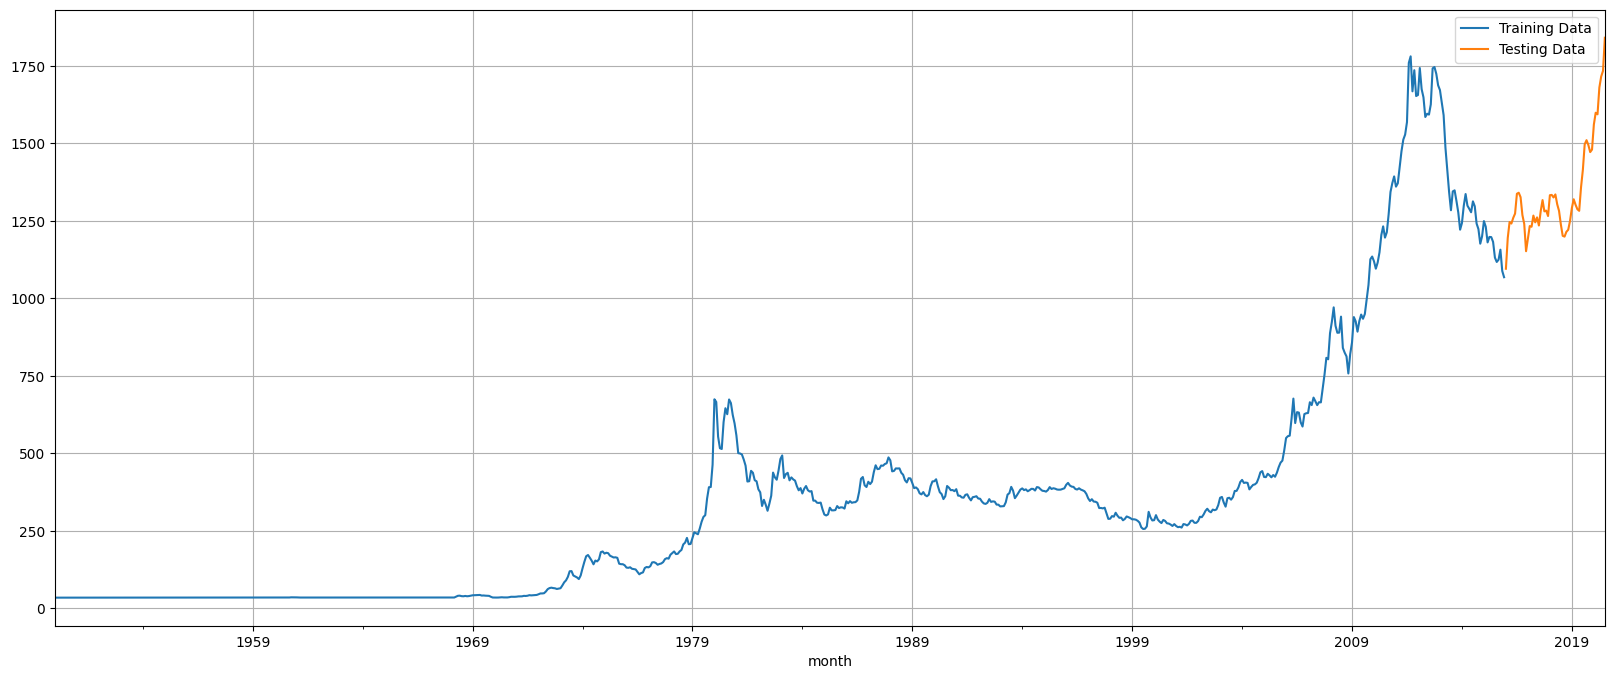

In [ ]:
# Plotting the Gold Price for training and testing data

# Step 1: Plot the Gold Price for the training dataset
train['Price'].plot(figsize=(20, 8))

# Step 2: Plot the Gold Price for the testing dataset
test['Price'].plot(figsize=(20, 8))

# Step 3: Add a legend to distinguish between training and testing data
plt.legend(['Training Data', 'Testing Data'])

# Step 4: Add a grid to the plot
plt.grid()

# Step 5: Display the plot
plt.show()

In [ ]:
# Create time indices for training and testing datasets

# Step 1: Create a list of time indices for the training dataset, starting from 1
train_time = [i + 1 for i in range(len(train))]

# Step 2: Create a list of time indices for the testing dataset, starting after the last index of the training dataset
test_time = [i + len(train) + 1 for i in range(len(test))]

# Step 3: Get the lengths of the two lists to verify their sizes
len(train_time),len(test_time)

(792, 55)

# **Performing Logistic Regression For Forecasting.**

In [ ]:
# Create copies of the training and testing datasets.

# Step 1: Create a copy of the training dataset
LR_train = train.copy()

# Step 2: Create a copy of the testing dataset
LR_test = test.copy()


In [ ]:
# Adding a 'Time' column to the training and testing datasets

# Step 1: Add a 'Time' column to the training dataset and populate it with the values from the train_time list
LR_train['Time1'] = train_time

# Step 2: Add a 'Time' column to the testing dataset and populate it with the values from the test_time list
LR_test['Time1'] = test_time


In [ ]:
# Creating a Linear Regression model and fit it to the training data

# Step 1: Create a Linear Regression model
lr = LinearRegression()

# Step 2: Fit the model to the training data, using 'Time' as the predictor and 'Price' as the target
lr.fit(LR_train[['Time1']], LR_train['Price'].values)

LinearRegression()

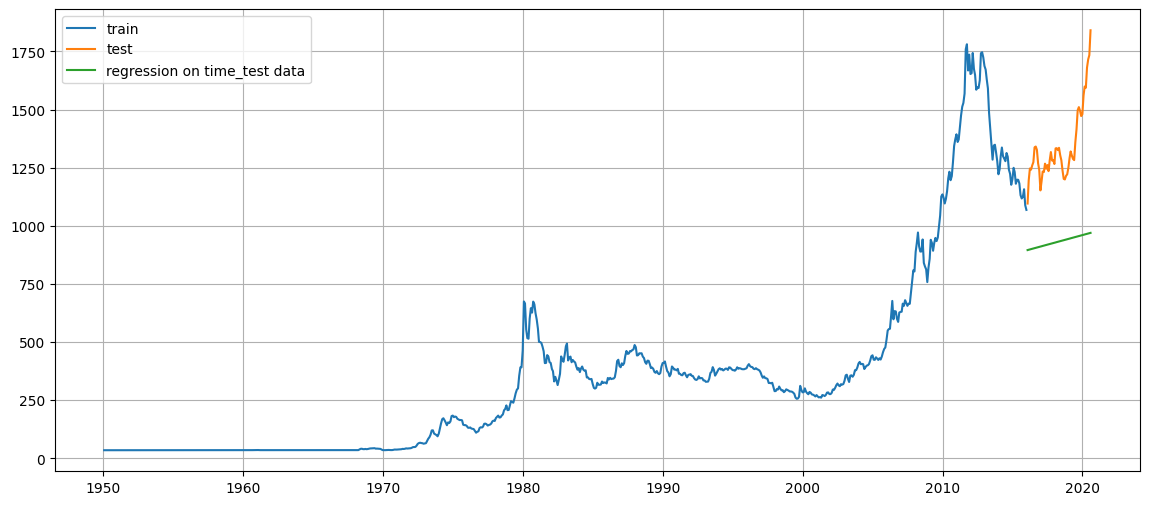

In [ ]:
# doing predictions on the testing data using the trained linear regression model

# Step 1: Use the trained model to make predictions on the testing data ('Time' as predictor)
test_prediction_model1 = lr.predict(LR_test[['Time1']])

# Step 2: Add the predicted values as a 'forecast' column to the testing dataset (LR_test)
LR_test['forecast'] = test_prediction_model1

# Step 3: Create a figure for plotting with a specified figure size
plt.figure(figsize=(14, 6))

# Step 4: Plot the Gold Price for the training dataset
plt.plot(train['Price'], label='train')

# Step 5: Plot the Gold Price for the testing dataset
plt.plot(test['Price'], label='test')

# Step 6: Plot the forecasted values from the linear regression model on the testing data
plt.plot(LR_test['forecast'], label='regression on time_test data')

# Step 7: Add a legend to the plot
plt.legend(loc='best')

# Step 8: Add a grid to the plot
plt.grid()

# Step 9: Show the plot
plt.show()

In [ ]:
import numpy as np

def mape(actual, pred):
    """
    Calculate the Mean Absolute Percentage Error (MAPE) between actual and predicted values.
    Parameters:
    - actual: Actual_values (ground truth)
    - pred: Predicted_values
    Returns:
    - MAPE as a percentage (rounded to two decimal places)
    """
    # Calculate absolute percentage errors for each observation
    abs_percentage_errors = np.abs((actual - pred) / actual)

    # Calculate the mean of absolute percentage errors and convert it to a percentage
    mape = np.mean(abs_percentage_errors) * 100

    # Round the result to two decimal places
    return round(mape, 2)

In [ ]:
# Calculate MAPE for model1's predictions on the testing data

# Step 1: Calculate MAPE using the mape function
mape_model1_test = mape(test['Price'].values, test_prediction_model1)

# Step 2: Print the MAPE result as a percentage with 3 decimal places
print("MAPE is %3.3f" % (mape_model1_test), "%")

MAPE is 29.760 %


In [ ]:
# Create a DataFrame to store the MAPE results

# Step 1: Create a DataFrame with a column 'Test mape (%)' and the calculated MAPE value
result_df1 = pd.DataFrame({'Test mape (%)': mape_model1_test}, index=['RegressionOnTime'])

# Step 2: Display the 'results' DataFrame
print(result_df1)


                  Test mape (%)
RegressionOnTime          29.76


# **Performing Naive Bayes For Forecasting.**

In [ ]:
# Creating both copies of the training and testing datasets for the naive method

# Step 1: Create a copy of the training dataset
Naivebayes_train = train.copy()

# Step 2: Create a copy of the testing dataset
Naivebayes_test = test.copy()


In [ ]:
# Implementing the naive forecasting method on the testing dataset

# Step 1: Assign the last observed value from the training dataset as the 'naive' forecast
Naivebayes_test['naive'] = np.array(train['Price'])[len(np.array(train['Price'])) - 1]

# Step 2: Display the first 5 rows of the 'naive' column
Naivebayes_test['naive'].head(5)

month
2016-01-31    1068.317
2016-02-29    1068.317
2016-03-31    1068.317
2016-04-30    1068.317
2016-05-31    1068.317
Name: naive, dtype: float64

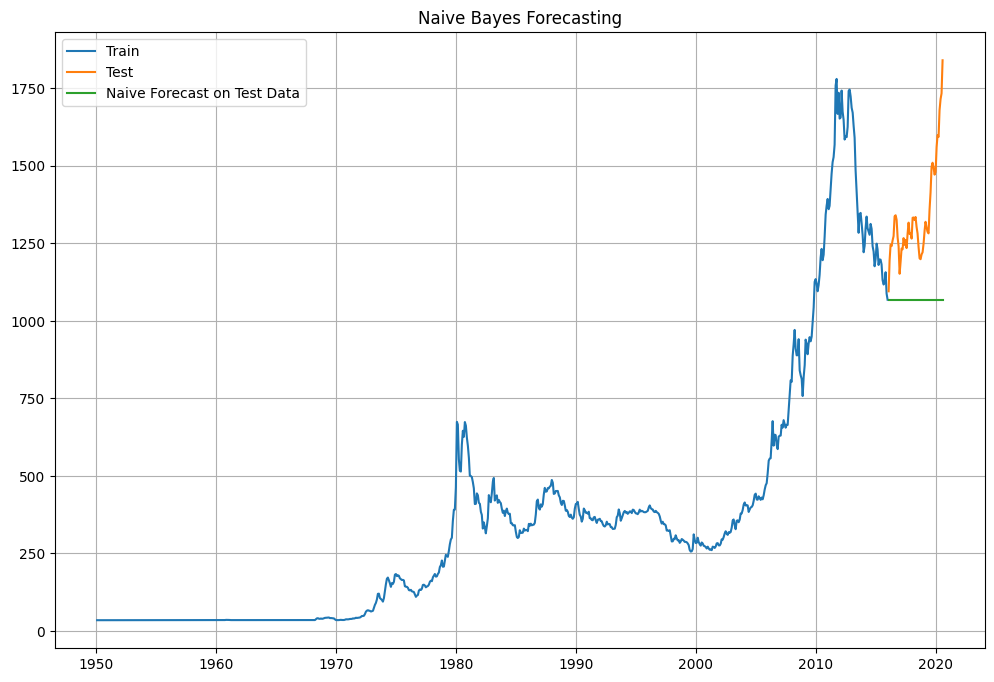

In [ ]:
# Plotting the results of the Naive forecasting method on the testing data

# Step 1: Create a figure for plotting with a specified figure size
plt.figure(figsize=(12, 8))

# Step 2: Plot the Gold Price for the training dataset
plt.plot(Naivebayes_train['Price'], label='Train')

# Step 3: Plot the Gold Price for the testing dataset
plt.plot(test['Price'], label='Test')

# Step 4: Plot the Naive Forecast on the testing data
plt.plot(Naivebayes_test['naive'], label='Naive Forecast on Test Data')

# Step 5: Add a legend to the plot
plt.legend(loc='best')

# Step 6: Set the title of the plot
plt.title('Naive Bayes Forecasting')

# Step 7: Add a grid to the plot
plt.grid()

# Step 8: Display the plot
plt.show()

In [ ]:
# Calculate the MAPE for Naive forecasting method on the testing data.

# Step 1: Calculate the MAPE using the mape function.
mape_model2_test = mape(test['Price'].values, Naivebayes_test['naive'].values)

# Step 2: Print the MAPE result as a percentage with 3 decimal places.
print("MAPE is %3.3f" % (mape_model2_test), "%")

MAPE is 19.380 %


In [ ]:
# Create a DataFrame to store the MAPE results for the Naive forecasting method

# Step 1: Create a DataFrame with a column 'Test mape (%)' and the calculated MAPE value
results_df2 = pd.DataFrame({'Test mape (%)': mape_model2_test}, index=['NaiveModel'])

# Step 2: Concatenate the new DataFrame (results_df2) with the previous DataFrame (results)
results = pd.concat([result_df1, results_df2])

# Print both the resuls
results

,Test mape (%)
RegressionOnTime,29.76
NaiveModel,19.38


# **Performing Exponential Smoothing For Forecasting.**


In [ ]:
# Create and fit an Exponential Smoothing (ETS) model

# Step 1: Create an Exponential Smoothing (ETS) model with specified components (trend and seasonal)
exs_model = ExponentialSmoothing(df, trend='additive', seasonal='additive')

# Step 2: Fit the ETS model to the data with specified smoothing parameters
final_model = exs_model.fit(smoothing_level=0.4, smoothing_trend=0.3, smoothing_seasonal=0.6)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [ ]:
# Calculate MAPE for the Exponential Smoothing (ETS) model's fitted values

# Step 1: Calculate MAPE using the mape function
mape_final_model = mape(df['Price'].values, final_model.fittedvalues)

# Step 2: Print the MAPE result
print('MAPE: ', mape_final_model)

MAPE:  17.24


In [ ]:
# Generate predictions for the testing data using the Exponential Smoothing (ETS) model

# Step 1: Use the 'forecast' method to generate predictions
prediction = final_model.forecast(steps=len(test))


In [ ]:
# Create a DataFrame to store forecasted values and confidence intervals

# Step 1: Calculate the lower and upper confidence intervals
lower_CI = prediction - 1.96 * np.std(final_model.resid, ddof=1)
upper_CI = prediction + 1.96 * np.std(final_model.resid, ddof=1)

# Step 2: Create a DataFrame 'pred_df' with columns for lower CI, prediction, and upper CI
pred_df = pd.DataFrame({
    'lower_CI': lower_CI,
    'Prediction': prediction,
    'upper_CI': upper_CI
})

# Step 3: Display the first 5 rows of 'pred_df'
pred_df.head(5)


,lower_CI,Prediction,upper_CI
2020-08-31,1684.720065,1792.871037,1901.022009
2020-09-30,1615.306077,1723.457050,1831.608022
2020-10-31,1538.567922,1646.718895,1754.869867
2020-11-30,1476.758600,1584.909572,1693.060545
2020-12-31,1459.327290,1567.478262,1675.629235


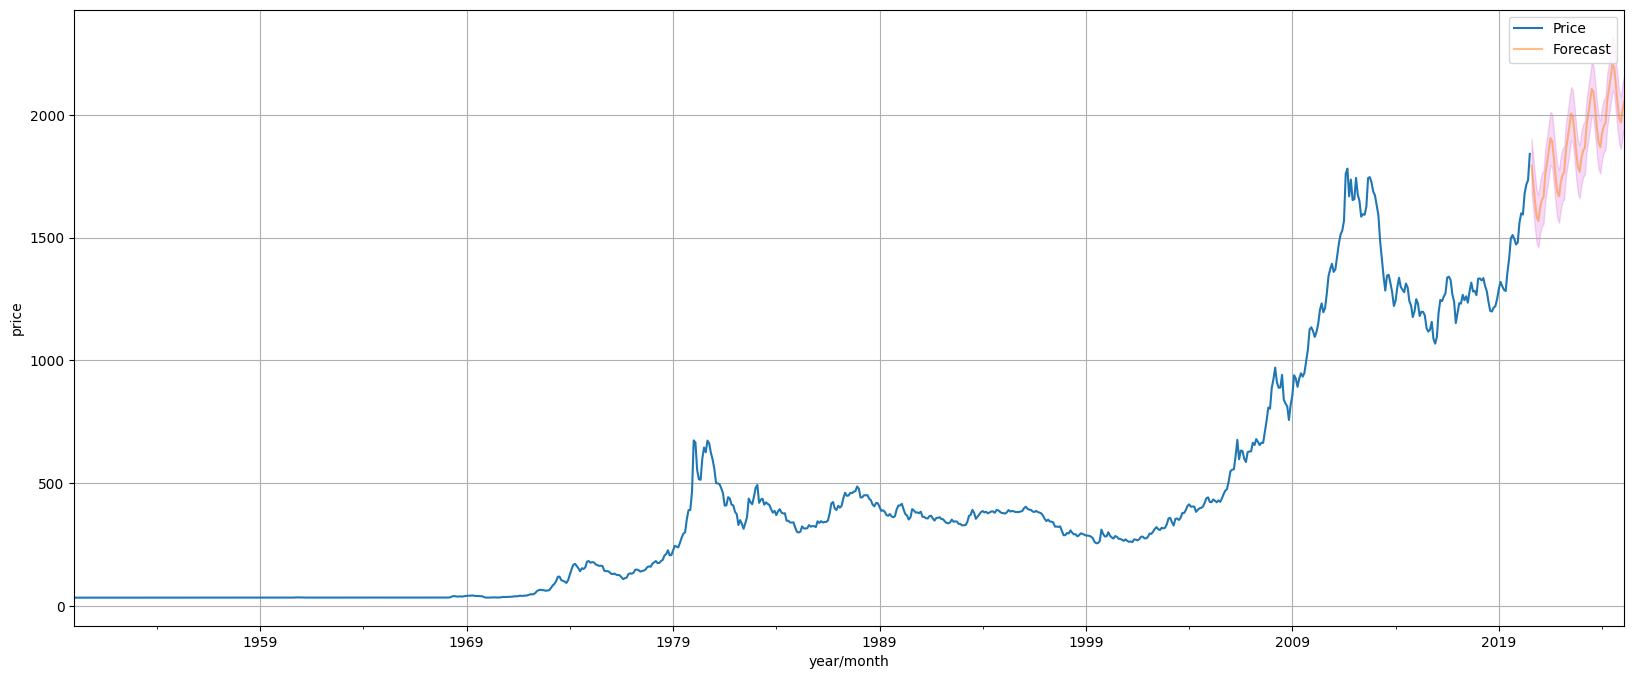

In [ ]:
# Create a plot to visualize actual values, forecast, and confidence intervals

# Step 1: Create a plot with 'Actual' as the label for the actual Gold Price values
axis = df.plot(label='Actual', figsize=(20, 8))

# Step 2: Plot the forecasted values from 'pred_df' with 'Forecast' as the label
pred_df['Prediction'].plot(ax=axis, label='Forecast', alpha=0.5)

# Step 3: Fill the area between the lower and upper confidence intervals with a shaded color
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_CI'], color='m', alpha=0.15)

# Step 4: Set the x-axis label
axis.set_xlabel('year/month')

# Step 5: Set the y-axis label
axis.set_ylabel('price')

# Step 6: Add a legend to the plot
plt.legend(loc='best')

# Step 7: Add gridlines to the plot for better visualization
plt.grid()

# Step 8: Show the plot
plt.show()
